In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/Users/Tim/PycharmProjects/HOI/')

In [3]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [4]:
from synthetic_data import nonstationary_ts_n, make_iid_example, mixed_multinormal
from HOI.preprocessings import compute_kernel, compute_kernel_n
from HOI.tests import test_lancaster, lancaster_permutation, test_independence

In [5]:
import matplotlib.pyplot as plt

In [6]:
def plot_test(data, mode):
    x = np.arange(0.1, 1, 0.1)
    y = np.array(data)

    fig = plt.figure(dpi=800)
    ax = fig.add_subplot(111)
    ax.set_ylim(0,1.05)
    ax.set_xlabel('dependence coefficient')
    ax.set_ylabel(mode)
    ax.set_title(mode + ' of dHSIC independence tests')
    plt.plot(x,y, marker='o', color='b')
    for i,j in zip(x,y):
        ax.annotate(str(j),xy=(i,j))
    plt.show()

# multinormal

In [15]:
power ={}
for d in tqdm(np.arange(1, 0.1, -0.1)):
    rejects = 0
    for i in tqdm(np.arange(100)):
        df = make_iid_example(mode='multi-normal', s = d, n_sample=300)
        data_dict, kernel_dict = compute_kernel(df)
        _, _, _, reject1 = test_lancaster([kernel_dict['d1'], kernel_dict['d2'],kernel_dict['d3']], n_perms=5000, alpha=0.05)       
        rejects = rejects + reject1
    power[str(d)] = rejects/100
    print(power)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'1.0': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

{'1.0': 1.0, '0.9': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

{'1.0': 1.0, '0.9': 1.0, '0.8': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

{'1.0': 1.0, '0.9': 1.0, '0.8': 1.0, '0.7000000000000001': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

{'1.0': 1.0, '0.9': 1.0, '0.8': 1.0, '0.7000000000000001': 1.0, '0.6000000000000001': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

{'1.0': 1.0, '0.9': 1.0, '0.8': 1.0, '0.7000000000000001': 1.0, '0.6000000000000001': 1.0, '0.5000000000000001': 0.99}


  0%|          | 0/100 [00:00<?, ?it/s]

{'1.0': 1.0, '0.9': 1.0, '0.8': 1.0, '0.7000000000000001': 1.0, '0.6000000000000001': 1.0, '0.5000000000000001': 0.99, '0.40000000000000013': 0.64}


  0%|          | 0/100 [00:00<?, ?it/s]

{'1.0': 1.0, '0.9': 1.0, '0.8': 1.0, '0.7000000000000001': 1.0, '0.6000000000000001': 1.0, '0.5000000000000001': 0.99, '0.40000000000000013': 0.64, '0.30000000000000016': 0.3}


  0%|          | 0/100 [00:00<?, ?it/s]

{'1.0': 1.0, '0.9': 1.0, '0.8': 1.0, '0.7000000000000001': 1.0, '0.6000000000000001': 1.0, '0.5000000000000001': 0.99, '0.40000000000000013': 0.64, '0.30000000000000016': 0.3, '0.20000000000000018': 0.08}


In [17]:
power_new = {'0.9': 1.0,
             '0.8': 1.0, 
             '0.7': 1.0, 
             '0.6': 1.0, 
             '0.5': 0.99,
             '0.4': 0.64, 
             '0.3': 0.3, 
             '0.2': 0.08,
             '0.1': 0.06}

# interpolated

In [16]:
power ={}
for d in tqdm(np.arange(0.1, 1, 0.1)):
    rejects = 0
    for i in tqdm(np.arange(100)):
        df = make_iid_example(mode='interpolated', s = d, n_sample=300)
        data_dict, kernel_dict = compute_kernel(df)
        _, _, _, reject1 = test_lancaster([kernel_dict['d1'], kernel_dict['d2'],kernel_dict['d3']], n_perms=5000, alpha=0.05)       
        rejects = rejects + reject1
    power[str(d)] = rejects/100
    print(power)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.09}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.09, '0.2': 0.02}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.09, '0.2': 0.02, '0.30000000000000004': 0.06}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.09, '0.2': 0.02, '0.30000000000000004': 0.06, '0.4': 0.27}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.09, '0.2': 0.02, '0.30000000000000004': 0.06, '0.4': 0.27, '0.5': 0.96}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.09, '0.2': 0.02, '0.30000000000000004': 0.06, '0.4': 0.27, '0.5': 0.96, '0.6': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [18]:
power_new = {'0.1': 0.09, 
             '0.2': 0.02, 
             '0.3': 0.06,
             '0.4': 0.27, 
             '0.5': 0.96, 
             '0.6': 1.0,
             '0.7': 1.0,
             '0.8': 1.0,
             '0.9': 1.0}

# factorisation

In [21]:
power ={}
for d in tqdm(np.arange(0.1, 1, 0.1)):
    rejects = 0
    for i in tqdm(np.arange(100)):
        df = make_iid_example(mode='factorisation', s = d, n_sample=300)
        data_dict, kernel_dict = compute_kernel(df)
        _, _, _, reject1 = test_lancaster([kernel_dict['d1'], kernel_dict['d2'],kernel_dict['d3']], n_perms=5000, alpha=0.05)       
        rejects = rejects + reject1
    power[str(d)] = rejects/100
    print(power)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.08}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.08, '0.2': 0.06}


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
{'0.1': 0.08, '0.2': 0.06}

In [22]:
power ={}
for d in tqdm(np.arange(0.7, 1, 0.1)):
    rejects = 0
    for i in tqdm(np.arange(100)):
        df = make_iid_example(mode='factorisation', s = d, n_sample=300)
        data_dict, kernel_dict = compute_kernel(df)
        _, _, _, reject1 = test_lancaster([kernel_dict['d1'], kernel_dict['d2'],kernel_dict['d3']], n_perms=5000, alpha=0.05)       
        rejects = rejects + reject1
    power[str(d)] = rejects/100
    print(power)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.7': 0.1}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.7': 0.1, '0.7999999999999999': 0.07}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.7': 0.1, '0.7999999999999999': 0.07, '0.8999999999999999': 0.13}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.7': 0.1, '0.7999999999999999': 0.07, '0.8999999999999999': 0.13, '0.9999999999999999': 0.07}


In [28]:
power_new = {'0.1': 0.03, 
             '0.2': 0.13, 
             '0.3': 0.09, 
             '0.4': 0.07,
             '0.5': 0.07,
             '0.6': 0.06,
             '0.7': 0.10, 
             '0.8': 0.07, 
             '0.9': 0.13, }

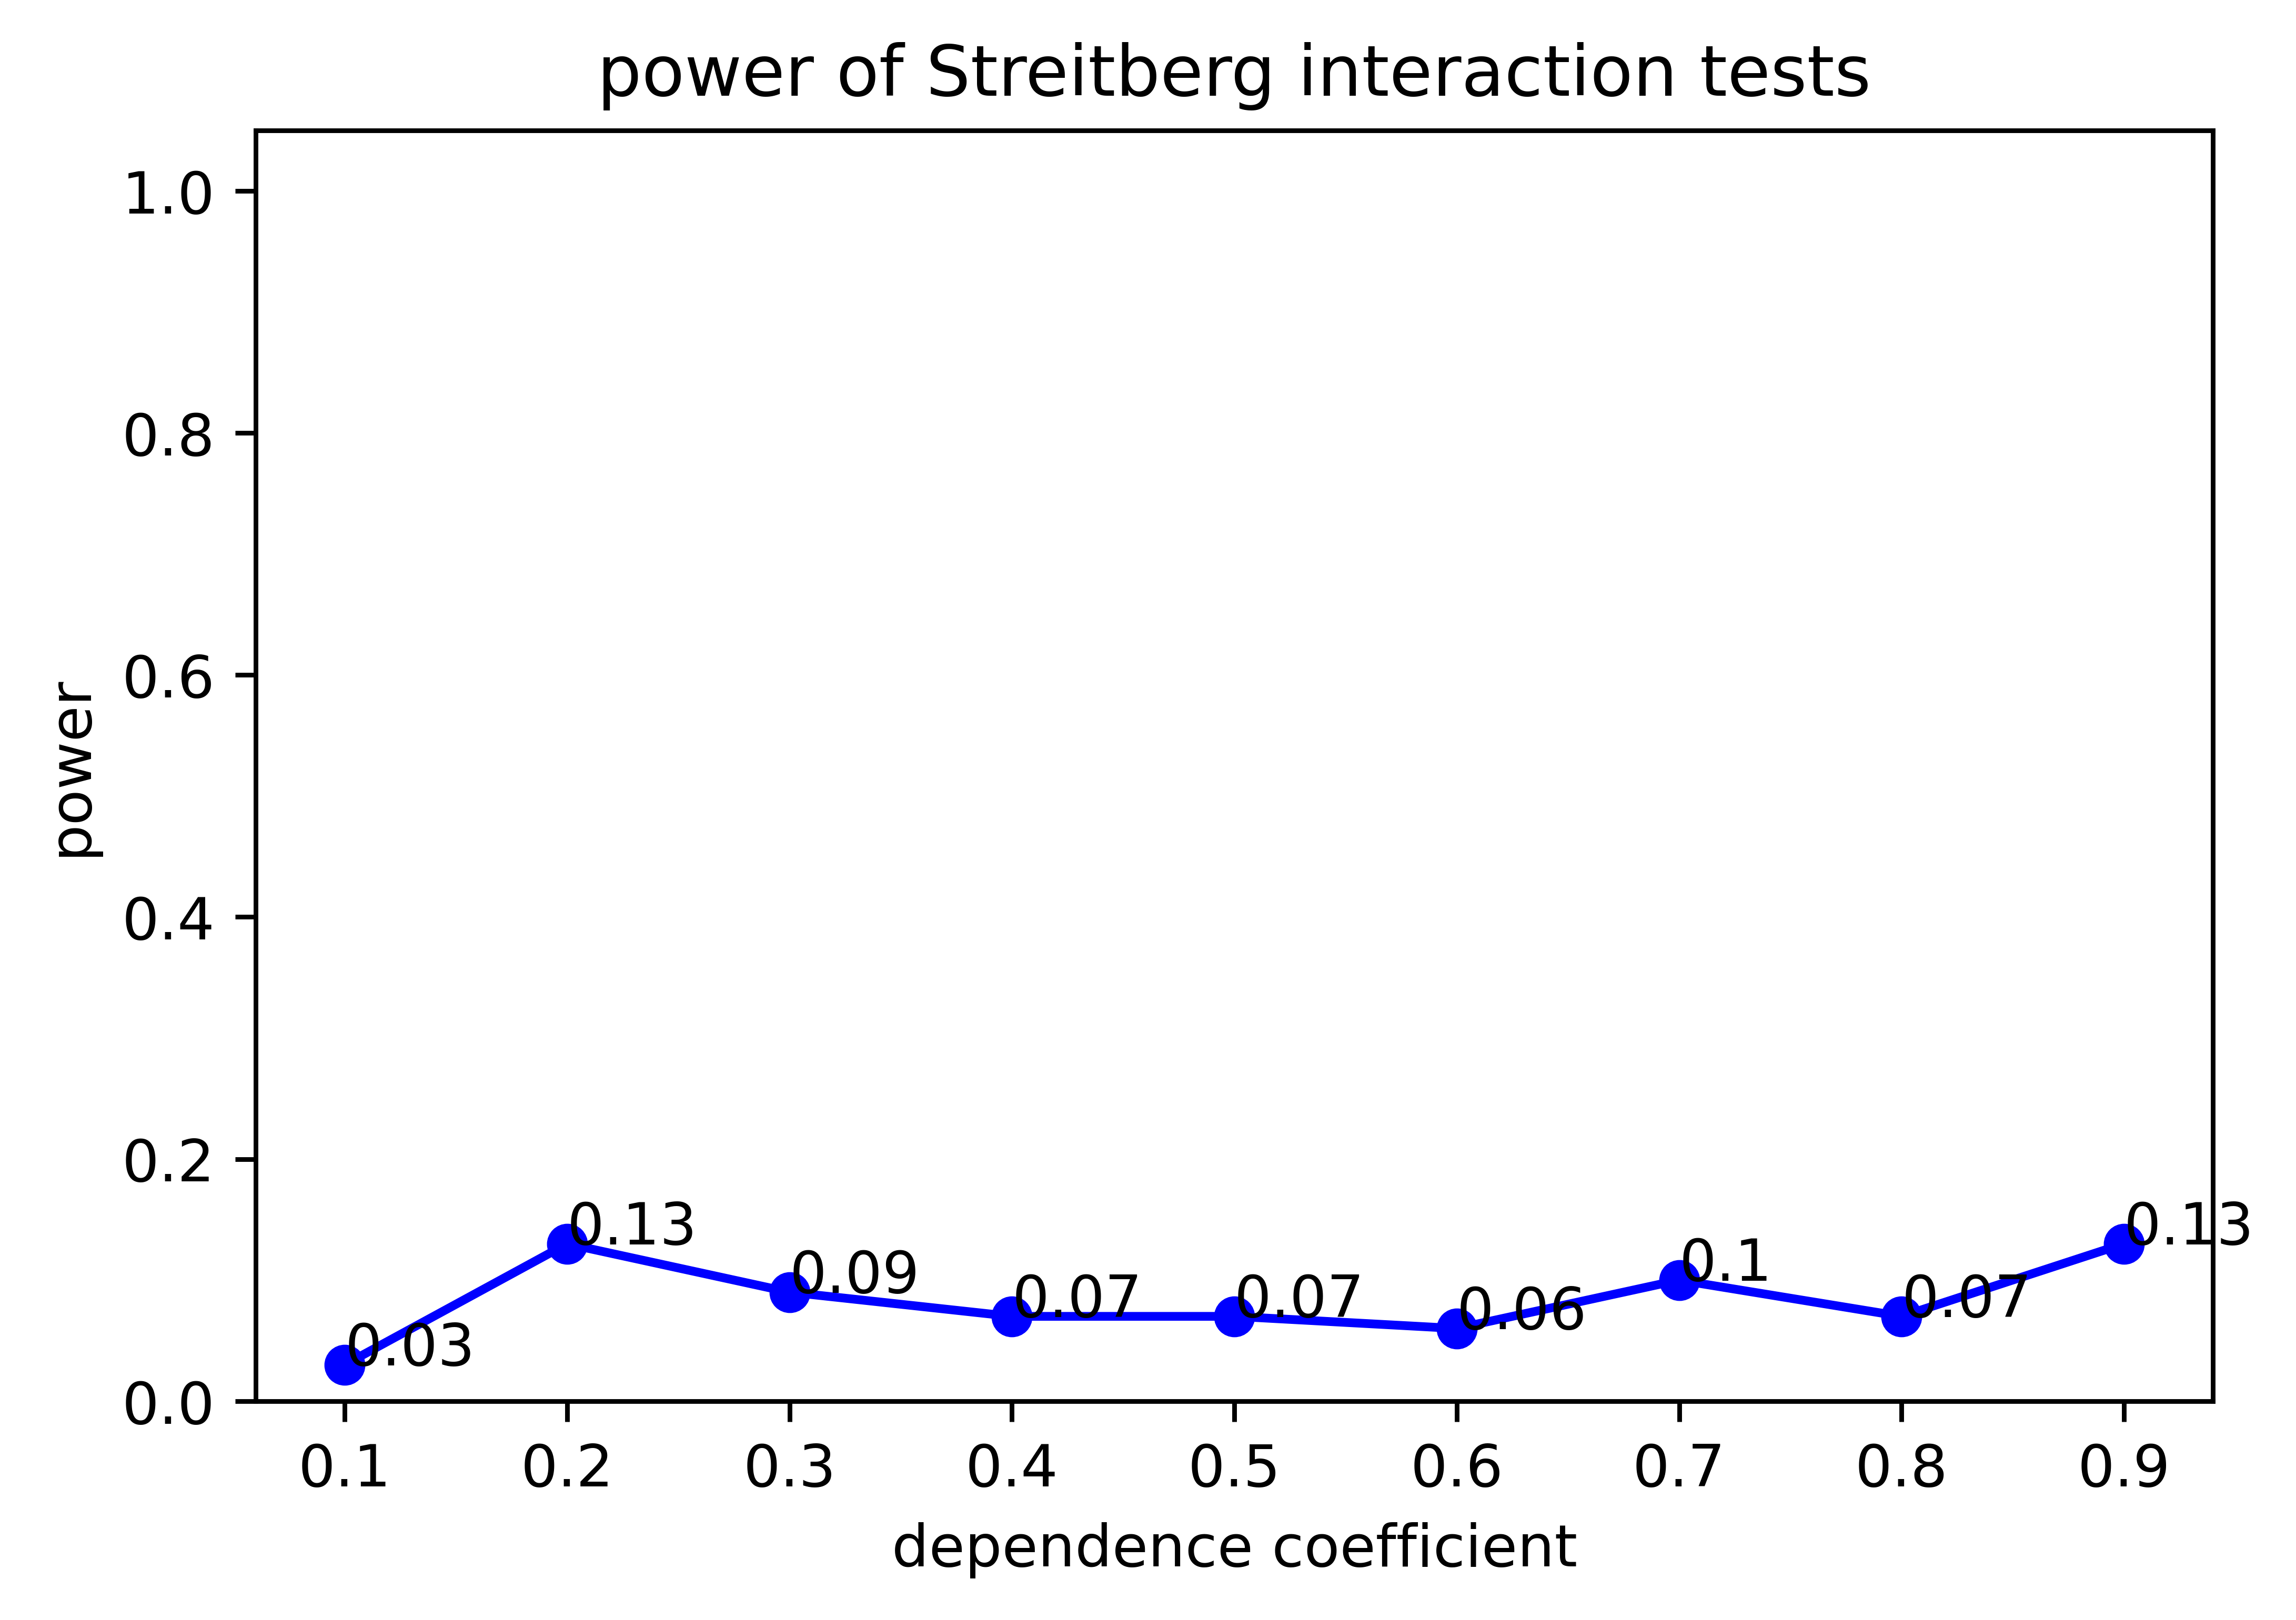

In [30]:
plot_test(list(power_new.values()), 'power')

In [27]:
power ={}
for d in tqdm([0.1,0.2,0.3,0.4]):
    rejects = 0
    for i in tqdm(np.arange(100)):
        df = make_iid_example(mode='interpolated', s = d, n_sample=300)
        data_dict, kernel_dict = compute_kernel(df)
        _, _, _, reject1 = test_independence([kernel_dict['d1'], kernel_dict['d2'], kernel_dict['d3']], None,
                                          mode = 'iid', n_perms=5000, alpha=0.05)
        rejects = rejects + reject1
    power[str(d)] = rejects/100
    print(power)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.03}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.03, '0.2': 0.13}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.03, '0.2': 0.13, '0.3': 0.79}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.03, '0.2': 0.13, '0.3': 0.79, '0.4': 1.0}


In [31]:
power_new = {'0.1': 0.03, 
             '0.2': 0.13, 
             '0.3': 0.79, 
             '0.4': 1.0,
             '0.5': 1.0,
             '0.6': 1.0,
             '0.7': 1.0,
             '0.8': 1.0,
             '0.9': 1.0}

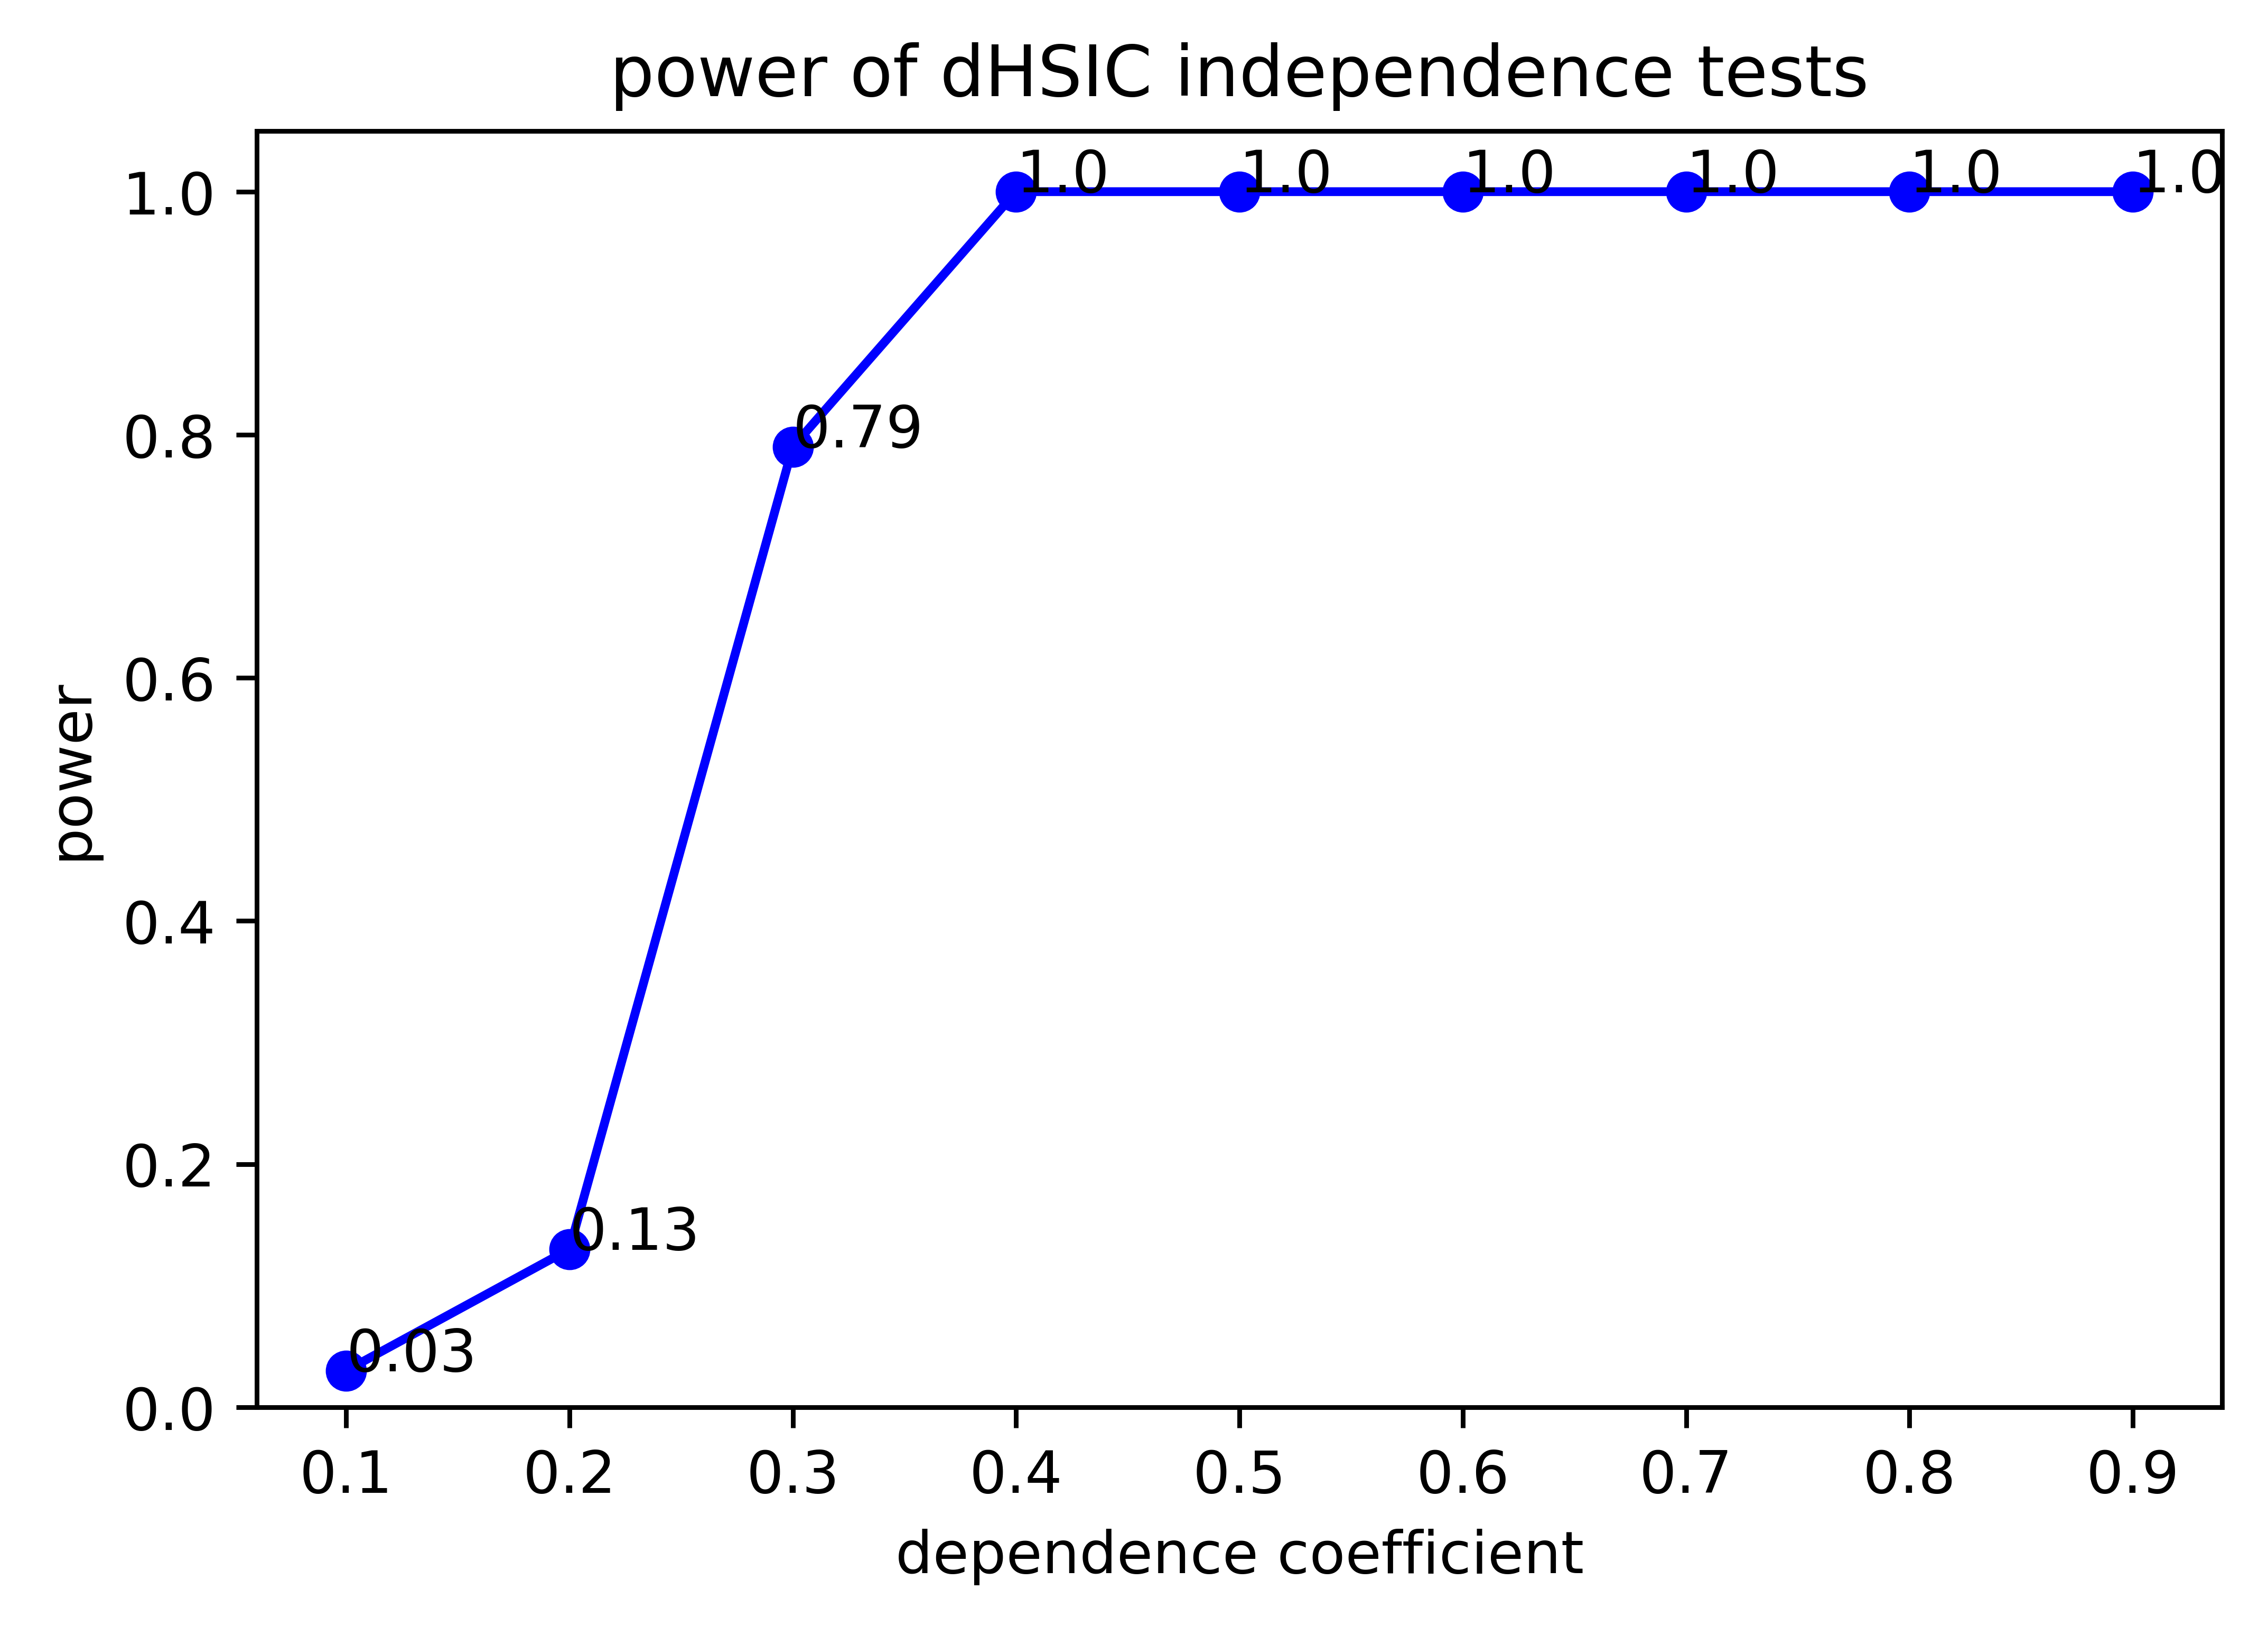

In [38]:
plot_test(list(power_new.values()), 'power')

# check factorisation

In [8]:
power ={}
for d in tqdm([0.9, 0.1]):
    rejects = 0
    for i in tqdm(np.arange(100)):
        df = make_iid_example(mode='check_factorisation', s = d, n_sample=300)
        data_dict, kernel_dict = compute_kernel(df)
        _, _, _, reject1 = test_lancaster([kernel_dict['d1'], kernel_dict['d2'],kernel_dict['d3']], n_perms=2000, alpha=0.05)       
        rejects = rejects + reject1
    power[str(d)] = rejects/100
    print(power)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.9': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.9': 1.0, '0.1': 0.07}


In [11]:
power ={}
for d in tqdm([0.9,0.1]):
    rejects = 0
    for i in tqdm(np.arange(100)):
        df = make_iid_example(mode='check_factorisation', s = d, n_sample=300)
        data_dict, kernel_dict = compute_kernel(df)
        _, _, _, reject1 = test_independence([kernel_dict['d1'], kernel_dict['d2'], kernel_dict['d3']], None,
                                          mode = 'iid', n_perms=2000, alpha=0.05)
        rejects = rejects + reject1
    power[str(d)] = rejects/100
    print(power)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.9': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.9': 1.0, '0.1': 0.24}


# added normal

In [7]:
power ={}
for d in tqdm([0.9,0.1]):
    rejects = 0
    for i in tqdm(np.arange(100)):
        df = mixed_multinormal(n_sample=300, d=d)
        data_dict, kernel_dict = compute_kernel(df)
        _, _, _, reject1 = test_lancaster([kernel_dict['d1'], kernel_dict['d2'],kernel_dict['d3']], n_perms=5000, alpha=0.05)       
        rejects = rejects + reject1
    power[str(d)] = rejects/100
    print(power)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.9': 0.28}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.9': 0.28, '0.1': 0.03}


In [ ]:
{'0.9': 0.28,
 '0.7': 0.17, 
 '0.5': 0.06, 
 '0.1': 0.03}

In [8]:
power ={}
for d in tqdm([0.9,0.1]):
    rejects = 0
    for i in tqdm(np.arange(100)):
        df = mixed_multinormal(n_sample=300, d=d)
        data_dict, kernel_dict = compute_kernel(df)
        _, _, _, reject1 = test_independence([kernel_dict['d1'], kernel_dict['d2'], kernel_dict['d3']], None,
                                          mode = 'iid', n_perms=2000, alpha=0.05)
        rejects = rejects + reject1
    power[str(d)] = rejects/100
    print(power)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.9': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.9': 1.0, '0.1': 0.09}


In [ ]:
{'0.9': 1.0,
 '0.1': 0.09}

# mixed normal

In [114]:
power ={}
for d in tqdm([0.9, 0.1]):
    rejects = 0
    for i in tqdm(np.arange(100)):
        df = mixed_multinormal(n_sample=300, d=d, mode='mixture')
        data_dict, kernel_dict = compute_kernel(df)
        _, _, _, reject1 = test_lancaster([kernel_dict['d1'], kernel_dict['d2'],kernel_dict['d3']], n_perms=5000, alpha=0.05)       
        rejects = rejects + reject1
    power[str(d)] = rejects/100
    print(power)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.9': 0.13}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.9': 0.13, '0.1': 0.06}
